In [1]:
## import the tools
import torch
import glob
from pathlib import Path
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors as NN
import glob
import pandas as pd
import ipdb
import laspy
import open3d as o3d
from tqdm.notebook import tqdm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
## import the model tools
from torch_geometric.transforms import Compose
from torch_points3d.core.data_transform import MinPoints,XYZFeature, AddFeatsByKeys, GridSampling3D, AddOnes
from torch_points3d.applications.pretrained_api import PretainedRegistry
from torch_geometric.data import Batch, Dataset, Data ,DataLoader


In [3]:
## to find the neighbor points prediction
from sklearn.neighbors import BallTree, KDTree
import numpy as np
def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""
    # src : whole gt points in a file 
    tree = KDTree(candidates, leaf_size=20, metric='euclidean')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    closest = np.squeeze(indices)
    closest_dist = distances

    return closest

In [4]:
model_folder = "2023-05-07/13-32-19/"
model_name = "SEUNet50.pt"
root_path = "/home/jf/Documents/msc/torch-3dpoints-powerline/"
pl_models_path = root_path+ "outputs/" + model_folder + model_name
model = torch.load(pl_models_path)
model['run_config']['data']['dataroot'] = '/home/jf/data'
torch.save(model, root_path+ "outputs/" + model_folder + model_name)
print(model['run_config']["data"]["train_transform"])
print(pl_models_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/jf/Documents/msc/torch-3dpoints-powerline/outputs/2023-05-07/13-32-19/SEUNet50.pt'

In [ ]:
print(model["models"].keys())
#model["models"]["best_miou"]

dict_keys(['latest', 'best_loss_seg', 'best_acc', 'best_macc', 'best_miou'])


In [5]:
print(model['run_config']["data"]["train_overlap"])

NameError: name 'model' is not defined

# MAKE SURE THESE PARAM MATCHES THE ONES ABOVE !!!!!

In [11]:
## transformer for non ones
    # pos_z = [ "pos_z" ]
    # list_add_to_x = [ True ]
    # delete_feats = [ True ]
    # first_subsampling = model['run_config']["data"]["first_subsampling"]
    # transform_test = Compose([MinPoints(512),
    #                     XYZFeature(add_x=False, add_y=False, add_z= True),
    #                     AddFeatsByKeys(list_add_to_x=list_add_to_x, feat_names= pos_z,delete_feats=delete_feats),
    #                     GridSampling3D(mode='last', size=first_subsampling, quantize_coords=True)
    #                     ])

## transformer for ones
pos_z = [ "ones" ]
list_add_to_x = [ True ]
delete_feats = [ True ]
first_subsampling = model['run_config']["data"]["first_subsampling"]
input_nc_feats = [1]

transform_test = Compose([MinPoints(512),
                    AddOnes(),
                    AddFeatsByKeys(list_add_to_x=list_add_to_x, feat_names= pos_z,delete_feats=delete_feats, input_nc_feats=input_nc_feats),
                    GridSampling3D(mode='last', size=first_subsampling, quantize_coords=True)
                    ])

In [12]:
### ['latest', 'loss_seg', 'acc', 'macc', 'miou']
model_pl = PretainedRegistry.from_file(pl_models_path, weight_name="miou").cuda()

INFO - 2023-05-09 09:35:17,729 - model_checkpoint - Loading checkpoint from /home/jf/Documents/msc/torch-3dpoints-powerline/outputs/2023-05-07/13-32-19/SEUNet50.pt


loading processed train split
Total of 14594 samples in train set.
loading processed val split
Total of 815 samples in val set.
loading processed test split
Total of 1232 samples in test set.
False
64
1
343
False
256
64
1
False
64
64
1
False
64
64
27
False
256
64
1
False
64
256
1
False
64
64
27
False
256
64
1
False
64
256
1
False
64
64
27
False
256
64
1
False
512
256
1
False
128
256
1
False
128
128
8
False
128
128
27
False
512
128
1
False
128
512
1
False
128
128
27
False
512
128
1
False
128
512
1
False
128
128
27
False
512
128
1
False
128
512
1
False
128
128
27
False
512
128
1
False
1024
512
1
False
256
512
1
False
256
256
8
False
256
256
27
False
1024
256
1
False
256
1024
1
False
256
256
27
False
1024
256
1
False
256
1024
1
False
256
256
27
False
1024
256
1
False
256
1024
1
False
256
256
27
False
1024
256
1
False
256
1024
1
False
256
256
27
False
1024
256
1
False
256
1024
1
False
256
256
27
False
1024
256
1
False
2048
1024
1
False
512
1024
1
False
512
512
8
False
512
512
27
False
2048

INFO - 2023-05-09 09:35:20,247 - model_checkpoint - Available weights : ['latest', 'loss_seg', 'acc', 'macc', 'miou']
INFO - 2023-05-09 09:35:20,248 - model_checkpoint - Model loaded from SEUNet50.pt:best_miou.


False
512
1024
1
False
128
1024
1
False
128
128
27
False
512
128
1
False
128
512
1
False
128
128
27
False
512
128
1
False
128
512
1
False
128
128
27
False
512
128
1
False
128
512
1
False
128
128
27
False
512
128
1
True
256
512
8
False
256
512
1
False
64
512
1
False
64
64
27
False
256
64
1
False
64
256
1
False
64
64
27
False
256
64
1
False
64
256
1
False
64
64
27
False
256
64
1
True
128
256
8
False
256
192
1
False
64
192
1
False
64
64
27
False
256
64
1
False
2
256
1


INFO - 2023-05-09 09:35:20,440 - bn_schedulers - Setting batchnorm momentum at 0.1


## Process with the normalize data

In [13]:
## load test pt with normalized

## load transform pt pre
processed_folder_name = model['run_config']['data']["processed_folder"] # "processed_hough"
data_root_path = model['run_config']['data']['dataroot'] + "/denmark"
processed_data_root_path = os.path.join(data_root_path, processed_folder_name)#"/home/jf/msc_data/denmark/processed_hough"
test_fold = processed_data_root_path + f"/test_0_({model['run_config']['data']['block_size_x']}, {model['run_config']['data']['block_size_y']})"

pre_trans_path = test_fold + "/stats.pt"
vis_out_folder = processed_data_root_path + '/vis/'

pre_transform = torch.load(pre_trans_path)

In [14]:
print(f"{pre_transform=}")


pre_transform={'room_names': ['PUNKTSKY_00005_1km_6219_494', 'PUNKTSKY_00005_1km_6211_474'], 'room_coord_min': [array([ 4.9406794e+07,  6.2190000e+08, -2.6480000e+03]), array([ 4.7416593e+07,  6.2110000e+08, -2.6480000e+03])], 'room_coord_max': [array([4.94999990e+07, 6.21971228e+08, 1.39850000e+04]), array([4.74999990e+07, 6.21199999e+08, 1.39850000e+04])], 'room_coord_scale': [array([ 2330.125,  1780.7  , 16633.   ]), array([ 2085.15 ,  2499.975, 16633.   ])], 'global_z': (-2648.0, 13985.0)}


In [15]:
## loop for every files
## delete files
global_z = pre_transform['global_z']
room_names = pre_transform['room_names']
room_coord_mins = pre_transform['room_coord_min']
room_coord_maxs = pre_transform['room_coord_max']
room_coord_scales = pre_transform['room_coord_scale']
files = list(glob.glob(test_fold + "/*PUNKTSKY_00005_1km_6219_494*cloud*pt"))

pred_data = []

for file in files:
    #print(file)
    sample = os.path.join(test_fold, file)
    pt_data = torch.load(sample)
    room_index = pt_data['room_idx']
    room_name = room_names[room_index]
    vis_out = os.path.join(vis_out_folder, room_name)
    Path(vis_out_folder).mkdir(exist_ok=True, parents=True)

    room_coord_scale = room_coord_scales[room_index]
    pos_ = pt_data['points']
    pt_ori = pos_ * room_coord_scale + room_coord_mins[room_index]
    data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(pos_.shape[0]).long()))
    # data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(1).long()))
    data_s.y = torch.zeros(data_s.batch.shape).long()
    f = get_nearest(pos_, data_s.pos)


    with torch.no_grad():
        model_pl.eval()
        model_pl.set_input(data_s, "cuda")
        model_pl.forward(data_s)
    
    pre = model_pl.output.cpu().numpy()
    m = torch.nn.functional.softmax(torch.tensor(pre), dim=1)
    cla_pre = np.argmax(m, axis=1)
    pre_ori = np.arange(len(pos_))
    if len(pos_) == 1:
        print(file)
        print(data_s)
        pre_ori[0] = cla_pre[0]
    else:
        for i in pre_ori:
            pre_ori[i] = cla_pre[f[i]]
    combine_pre = np.column_stack((pt_ori, pre_ori.T))

    pred_data.append(combine_pre)

    vis_out = vis_out_folder + room_name +'pre.txt'
    if os.path.exists(vis_out):
        file_save = open(vis_out, 'a')
    else:
        file_save = open(vis_out, 'w')

    file_save = open(vis_out_folder + room_name +'pre.txt', 'a')
    np.savetxt(file_save, combine_pre, fmt = '%1.5f')
#     file_save.write("\n")    
#     break
print("save finished")

/home/jf/data/denmark/processed_hough_20_ones/test_0_(0.025, 0.025)/PUNKTSKY_00005_1km_6219_494_cloud_251.pt
Batch(batch=[1], coords=[1, 3], grid_size=[1], pos=[1, 3], x=[1, 1], y=[1])
/home/jf/data/denmark/processed_hough_20_ones/test_0_(0.025, 0.025)/PUNKTSKY_00005_1km_6219_494_cloud_102.pt
Batch(batch=[1], coords=[1, 3], grid_size=[1], pos=[1, 3], x=[1, 1], y=[1])


KeyboardInterrupt: 

In [39]:
print(len(files))
print(len(pred_data))
print(pred_data)
pred_data = np.array([item for sublist in pred_data for item in sublist])
print(len(pred_data))


526
526
[array([[4.94883530e+07, 6.21935615e+08, 5.96800000e+03, 0.00000000e+00],
       [4.94883590e+07, 6.21935648e+08, 5.96400000e+03, 0.00000000e+00],
       [4.94883960e+07, 6.21935644e+08, 5.96500000e+03, 0.00000000e+00],
       ...,
       [4.94883720e+07, 6.21935619e+08, 7.51000000e+03, 1.00000000e+00],
       [4.94883820e+07, 6.21935615e+08, 5.96600000e+03, 0.00000000e+00],
       [4.94883500e+07, 6.21935617e+08, 5.96900000e+03, 0.00000000e+00]]), array([[4.94860250e+07, 6.21928494e+08, 6.04000000e+03, 0.00000000e+00],
       [4.94860440e+07, 6.21928510e+08, 6.03600000e+03, 0.00000000e+00],
       [4.94860800e+07, 6.21928507e+08, 6.03400000e+03, 0.00000000e+00],
       ...,
       [4.94860600e+07, 6.21928500e+08, 6.03200000e+03, 0.00000000e+00],
       [4.94860270e+07, 6.21928502e+08, 6.03600000e+03, 0.00000000e+00],
       [4.94860830e+07, 6.21928493e+08, 6.30800000e+03, 0.00000000e+00]]), array([[4.94743920e+07, 6.21903579e+08, 5.49900000e+03, 0.00000000e+00],
       [4.9474

### Simple vis

In [40]:
## read path
filename = "PUNKTSKY_00005_1km_6219_494"
vis_out_folder
pred_path = os.path.join(vis_out_folder, filename+"pre.txt")
pred_data = pd.read_csv(pred_path, sep=" ", header=None).values
pred_data, pred_data.shape

(array([[4.94883530e+07, 6.21935615e+08, 5.96800000e+03, 0.00000000e+00],
        [4.94883590e+07, 6.21935648e+08, 5.96400000e+03, 0.00000000e+00],
        [4.94883960e+07, 6.21935644e+08, 5.96500000e+03, 0.00000000e+00],
        ...,
        [4.94975470e+07, 6.21949785e+08, 6.44500000e+03, 0.00000000e+00],
        [4.94973900e+07, 6.21949805e+08, 5.84600000e+03, 0.00000000e+00],
        [4.94974540e+07, 6.21949797e+08, 6.05000000e+03, 0.00000000e+00]]),
 (4334406, 4))

In [41]:
## vis
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib notebook

In [42]:
idx = np.arange(len(pred_data))
np.random.shuffle(idx)
idx = idx[:30000]

vmin = pred_data[idx, -1].min()
vmax = pred_data[idx, -1].max()
cm = plt.colormaps['RdYlBu']

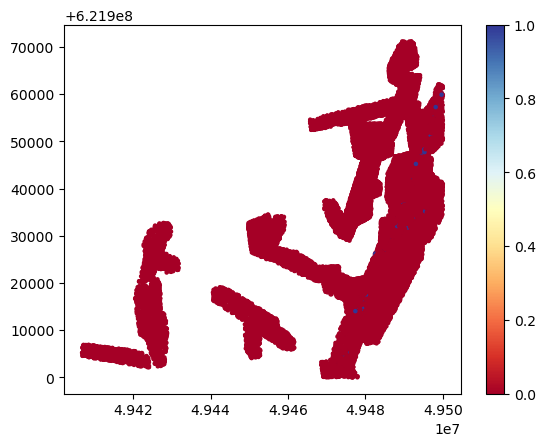

In [43]:
plt.figure()
sc = plt.scatter(pred_data[idx, 0], pred_data[idx, 1], c =pred_data[idx, -1],
                cmap=cm, vmin=vmin, vmax=vmax, s=5
            )
plt.colorbar(sc)

# Convert prediction from pt to las file

## Reading in the laspy data. Both the unprocessed and the processed data

In [44]:
normal_laz_file = os.path.join(data_root_path, "raw", "test",filename+".laz")
processed_laz_file = os.path.join(data_root_path, "raw", "test", "NewLaz", filename+".laz")
print(normal_laz_file)
print(processed_laz_file)
non_processed_laz = laspy.read(normal_laz_file, laz_backend=laspy.compression.LazBackend.LazrsParallel)
processed_laz = laspy.read(processed_laz_file, laz_backend=laspy.compression.LazBackend.LazrsParallel)
non_processed_point_data = np.stack([non_processed_laz.X, non_processed_laz.Y, non_processed_laz.Z], axis=0).transpose((1, 0))
processed_point_data = np.stack([processed_laz.X, processed_laz.Y, processed_laz.Z], axis=0).transpose((1, 0))
print(len(non_processed_point_data))
print(len(processed_point_data))


/home/jf/data/denmark/raw/test/PUNKTSKY_00005_1km_6219_494.laz
/home/jf/data/denmark/raw/test/NewLaz/PUNKTSKY_00005_1km_6219_494.laz
4095
4095
19684629
4364059


### Getting the powerline coordinates

In [45]:
powerline_pts = pred_data[np.where(pred_data[:,3] == 1)].copy()
powerline_pts_coord = powerline_pts[:,:-1].astype(np.int32)

#### Sanity checks for converting from pt to las data


In [46]:
print(f"There are {processed_point_data.shape} points in the las file")
print(f"There are {pred_data.shape} points from the pt files")
#Some points could get lost if there are not that many points in the tile


There are (4364059, 3) points in the las file
There are (4334406, 4) points from the pt files


In [47]:
print(powerline_pts_coord[:10])
print(processed_point_data[:10])

print(f"laz data x max {np.max(processed_point_data[:,0])}")
print(f"pt x max {np.max(powerline_pts_coord[:,0])}")
print(f"laz data y max {np.max(processed_point_data[:,1])}")
print(f"pt y max {np.max(powerline_pts_coord[:,1])}")
print(f"laz data z max {np.max(processed_point_data[:,2])}")
print(f"pt z max {np.max(powerline_pts_coord[:,2])}")


[[ 49488355 621935619      7514]
 [ 49488363 621935654      7506]
 [ 49488397 621935688      7514]
 [ 49489079 621935625      7518]
 [ 49488403 621935721      7511]
 [ 49488716 621935685      7834]
 [ 49489082 621935657      7510]
 [ 49488423 621935747      7515]
 [ 49488733 621935712      7838]
 [ 49489104 621935683      7514]]
[[ 49420222 621902558      6254]
 [ 49420260 621902563      6253]
 [ 49420132 621902577      6256]
 [ 49420171 621902583      6254]
 [ 49420211 621902588      6255]
 [ 49420244 621902592      6255]
 [ 49420016 621902596      6255]
 [ 49420050 621902600      6255]
 [ 49420085 621902605      6255]
 [ 49420121 621902610      6258]]
laz data x max 49499999
pt x max 49499998
laz data y max 621971228
pt y max 621961351
laz data z max 17597
pt z max 10049


### Viz the las files

In [48]:
# Visualise all data
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(non_processed_point_data)
o3d.visualization.draw_geometries([geom])
print(np.sum(non_processed_laz.classification == 14))

18363


In [49]:
# Visualise all data after removal of points
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(processed_point_data)
o3d.visualization.draw_geometries([geom])
print(np.sum(processed_laz.classification == 14))

18363


### Add dimension to processed las file 

In [50]:
non_processed_laz.add_extra_dim(laspy.ExtraBytesParams(
    name="prediction",
    type=np.uint8,
    description="The prediction of the model"
))

In [51]:
# Get the idx of the powerline points in the las file
idx = get_nearest(powerline_pts_coord,non_processed_point_data)
pred = np.zeros(len(non_processed_point_data))
pred[idx] = 1
non_processed_laz.prediction = pred

#### Viz all the powerline points

In [52]:
powerline_las = non_processed_laz[non_processed_laz.prediction == 1]
powerline_points_data = np.stack([powerline_las.X, powerline_las.Y, powerline_las.Z], axis=0).transpose((1, 0))

In [53]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(powerline_points_data)
o3d.visualization.draw_geometries([geom])

#### Save the new file

In [54]:
processed_data_root_path = os.path.join(data_root_path, processed_folder_name)#"/home/jf/msc_data/denmark/processed_hough"
eval_folder = os.path.join(processed_data_root_path, "eval")
Path(eval_folder).mkdir(exist_ok=True, parents=True)
eval_file_name = os.path.join(eval_folder, filename+".laz")
non_processed_laz.write(str(eval_file_name), do_compress =True, laz_backend=laspy.compression.LazBackend.LazrsParallel)

### check the individual pt


In [29]:
onesample = test_fold + "PUNKTSKY_00005_1km_6211_474_cloud_56.pt"
#onesample = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/test_some/denmark/processed/test_0_(0.05, 0.05)/PUNKTSKY_00005_1km_6090_507_cloud_335.pt"
pt_data = torch.load(onesample)
pt_data['points'].shape, pt_data['points']
data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(pos_.shape[0]).long()))
# data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(1).long()))
data_s.y = torch.zeros(data_s.batch.shape).long()


FileNotFoundError: [Errno 2] No such file or directory: '/home/jf/data/denmark/processed_hough_20cm/test_0_(0.025, 0.025)PUNKTSKY_00005_1km_6211_474_cloud_56.pt'

In [ ]:
### check the individual pt

# pos_ = pt_data['points']
# data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(pos_.shape[0]).long()))
# # data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(1).long()))
# data_s.y = torch.zeros(data_s.batch.shape).long()
# f = get_nearest(pos_, data_s.pos)
# f.shape, f
# f.max(), data_s.pos.shape

# with torch.no_grad():
#     model_pl.set_input(data_s, "cuda")
#     model_pl.forward(data_s)

# pre = model_pl.output.cpu().numpy()
# pre.shape

In [ ]:
## change the model config path
# model_path = "./outputs/2022-02-16/11-00-40/PointNet_old.pt"
# model = torch.load(model_path)
# model['run_config']['data']['dataroot'] = '/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/'
# torch.save(model, "./outputs/2022-02-16/11-00-40/PointNet_modified.pt")

In [ ]:
processed_split_folder = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_for_exp_allClasses/denmark/processed/"
processed_split_folder = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/denmark/processed/"

processed_split_folder = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/test_some/denmark/processed"

test_fold = processed_split_folder + "test_0_(0.05, 0.05)/"
processed_file_names = list(Path(test_fold).glob("*cloud_*.pt"))
len(processed_file_names)


0